# 激活函數
```
step01 - 定義sigmoid函式
step02 - 建立資料(x = -5~5中間每隔0.1，創建一個點)
step03 - 將各點x激活sigmoid -> y
step04 - 劃出圖形
```

## sigmoid 


In [22]:
import numpy as np
import matplotlib.pylab as plt
import time

def sigmoid(z):
    return 1 / ( 1  + np.exp(-z) )
    

In [24]:
# -5~5中間每隔0.1，創建一個點
start = time.time()
X = np.arange(-5.0, 100, 0.1)
X

array([-5. , -4.9, -4.8, ..., 99.7, 99.8, 99.9])

In [26]:
Y = sigmoid(X)
Y

array([0.00669285, 0.00739154, 0.00816257, ..., 1.        , 1.        ,
       1.        ])

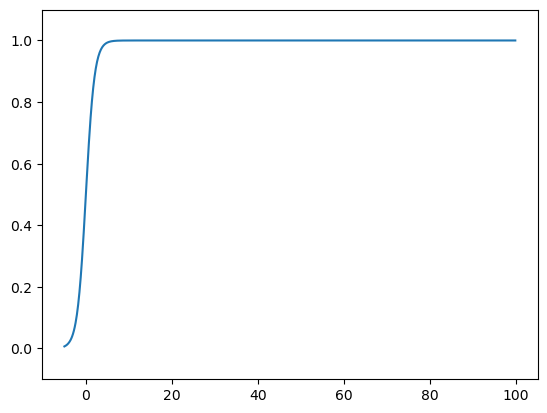

It cost 0.000000 sec


In [49]:
start = time.time()
X = np.arange(-5.0, 100, 0.1)
Y = sigmoid(X)
now = time.time()
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()
print("It cost %f sec" % (now-start))


## Tangent
$$ -1\leq  tanh(z)\leq 1$$

公式：
$$z=tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}} \quad$$
    
優點就是與 sigmoid 的區別是，tanh 解決了sigmoid的輸出非「零為中心」的問題，因此實際應用中 tanh 會比 sigmoid 更好。<br>

缺點類似sigmoid，雖然收斂速度相對快了，但也存在梯度彌散，而且也有冪計算，相對耗時。

In [30]:
def tangent(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))



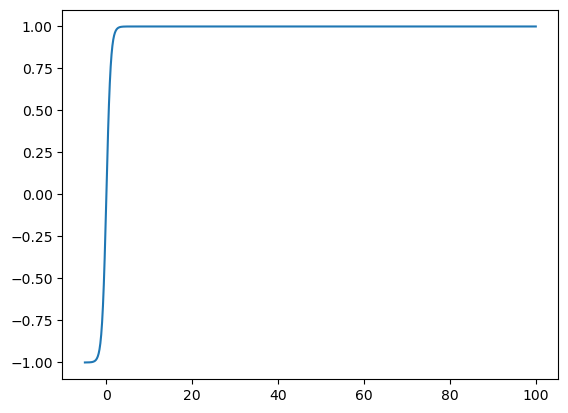

It cost 0.000997 sec


In [32]:
start = time.time()
x = np.arange(-5.0, 100, 0.1)
y = tangent(x)
now = time.time()
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()
print("It cost %f sec" % (now-start))

## Relu
$$relu=max(0,z)$$
優點：
* SGD算法的收斂速度比 sigmoid 和 tanh 快；（梯度不會飽和，解決了梯度消失問題）
* 計算復雜度低，不需要進行指數運算；
* 適合用於後向傳播。

缺點：

* ReLU的輸出不是zero-centered；
* Dead ReLU Problem（神經元壞死現象）：某些神經元可能永遠不會被激活，導致相應參數永遠不會被更新（在負數部分，梯度為0）。產生這種現象的兩個原因：參數初始化問題；learning rate太高導致在訓練過程中參數更新太大。 避免將learning rate設置太大或使用自動調節learning rate的算法。

In [34]:
def relu(x):
    return np.maximum(0,x)
    '''
    for i in range(len(x)):
        if x[i] < 0:
            x[i]=0
    return x
    '''

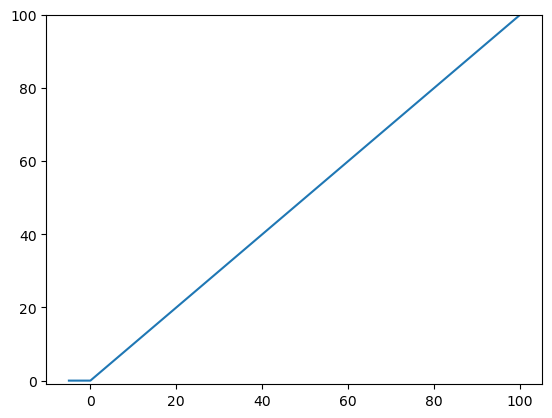

It cost 0.000000 sec


In [47]:
start = time.time()
x = np.arange(-5.0, 100, 0.1)
y = relu(x)
now = time.time()
plt.plot(x, y)
plt.ylim(-1.0, 100)
plt.show()
print("It cost %f sec" % (now-start))